In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('../build/trajectory_log.csv')
print(df.describe())
df

               seq            x            y
count  1280.000000  1280.000000  1280.000000
mean     10.000000  1007.824505  1147.775469
std       5.746808    52.606280    16.996706
min       1.000000   909.783000  1128.720000
25%       5.000000   961.397000  1131.730000
50%      10.000000  1006.270000  1143.045000
75%      15.000000  1052.545000  1162.507500
max      19.000000  1113.430000  1181.530000


,seq,x,y
0,1,909.783,1128.77
1,1,910.183,1128.76
2,1,910.584,1128.76
3,1,910.984,1128.76
4,1,911.385,1128.75
5,1,911.786,1128.75
6,1,912.188,1128.75
7,1,912.589,1128.74
8,1,912.991,1128.74
9,1,913.393,1128.74


In [38]:
last_seq = df.seq.values[0]
x=[]
y=[]
last_x = -1e9

df_vehicle = pd.DataFrame({'seq': [], 'x': [], 'y': []})


for (idx,seq) in enumerate(df.seq):
    if seq != last_seq:
        print(last_seq, seq, df.x[idx])
        df_temp = df[ (df['seq'] == last_seq) & (df.x < df.x[idx]) ]
        print(df_temp)
        df_vehicle = df_vehicle.append(df_temp)
        last_seq = seq
        

1 3 925.977
    seq        x        y
0     1  909.783  1128.77
1     1  910.183  1128.76
2     1  910.584  1128.76
3     1  910.984  1128.76
4     1  911.385  1128.75
5     1  911.786  1128.75
6     1  912.188  1128.75
7     1  912.589  1128.74
8     1  912.991  1128.74
9     1  913.393  1128.74
10    1  913.795  1128.74
11    1  914.197  1128.73
12    1  914.599  1128.73
13    1  915.002  1128.73
14    1  915.405  1128.73
15    1  915.807  1128.72
16    1  916.210  1128.72
17    1  916.614  1128.72
18    1  917.017  1128.72
19    1  917.420  1128.72
20    1  917.824  1128.72
21    1  918.228  1128.72
22    1  918.632  1128.72
23    1  919.036  1128.72
24    1  919.441  1128.72
25    1  919.845  1128.72
26    1  920.250  1128.72
27    1  920.655  1128.72
28    1  921.060  1128.72
29    1  921.465  1128.72
30    1  921.870  1128.72
31    1  922.275  1128.73
32    1  922.681  1128.73
33    1  923.087  1128.73
34    1  923.493  1128.74
35    1  923.899  1128.74
36    1  924.305  1128.74


IndexError: single positional indexer is out-of-bounds

In [66]:
len(df_vehicle)
df_vehicle.head(20)

,seq,x,y
0,1.0,909.783,1128.77
1,1.0,910.183,1128.76
2,1.0,910.584,1128.76
3,1.0,910.984,1128.76
4,1.0,911.385,1128.75
5,1.0,911.786,1128.75
6,1.0,912.188,1128.75
7,1.0,912.589,1128.74
8,1.0,912.991,1128.74
9,1.0,913.393,1128.74


20.0


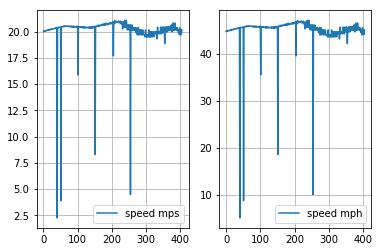

In [74]:
positions = df_vehicle.values[:,1:]
move_vector = np.diff(positions, axis=0)
dT=0.02
speed = np.sqrt(np.sum(move_vector**2, axis=1))/dT 

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(121)
ax.plot(speed, label='speed mps')
ax.grid('on')
ax.legend()

ax = plt.subplot(122)
ax.plot(speed * 2.23694, label='speed mph')
ax.legend()
ax.grid('on')

plt.show()